<a href="https://colab.research.google.com/github/Aditya950/EDA/blob/main/AirBNB_Aditya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Project Name** - Airbnb Bookings Analysis

**Project Type** - EDA

Contribution - Individual(Aditya Poonia)

## **Project Summary -**

*italicized text Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more.*

 **This dataset has around 43,000 observations in it with 16 columns and it is a mix between categorical and numeric values.**

## **Problem Statement**

**Write Problem Statement Here.**

*   What is the overall distribution of room in our dataset
*   what are the Diffrent type of room distributed in neighbourhood group
*   distribution across latitude and longitude with different room types.
*   who has the most listings and in which neighbourhood?
*   Top 10 neighbourhoods with maximum listings
*   Top Keywords used in the listing Property by users Host's
*   What is the average preferred price by customers according to the location and room type?
*   Analyzing the number of reviews and room availability with respect to price
*   which neighbourhood has got maximum number of reviews.
*   Room Availability by neighbourhood_group
*   What is the average preferred price by customers according to the location?
*   Find total no. of nights spend per location



# **Define Your Business Objective?**

Our Business Objective is to see

*   What type of properties are being listed by the Host's
*   What is the targeted area among all the neighbourhood's
*   what is the price which fit's to customers in terms of room type and locations
*   As a consumer prespective we will also see Which are the areas where the trafiic is maximum and how we can use those area in term of business
*   We will also see the host's who's property is reviwed more, so that they can get extra benefites from Airbnb to helping and Growing business



# **1.Know your Data**

**Importing Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

from wordcloud import WordCloud, ImageColorGenerator

In [3]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
filepath= '/content/drive/MyDrive/NYC-Airbnb-2023.csv'
airbnb_df=pd.read_csv(filepath)

In [5]:
# Dataset First Look
airbnb_df.head()

id                                         name  host_id  host_name  \
0  2595.0                        Skylit Midtown Castle     2845   Jennifer   
1  5121.0                              BlissArtsSpace!     7356      Garon   
2  5203.0           Cozy Clean Guest Room - Family Apt     7490  MaryEllen   
3  5178.0             Large Furnished Room Near B'way　     8967   Shunichi   
4  5136.0  Large Sunny Brooklyn Duplex, Patio + Garden     7378    Rebecca   

  neighbourhood_group       neighbourhood  latitude  longitude  \
0           Manhattan             Midtown  40.75356  -73.98559   
1            Brooklyn  Bedford-Stuyvesant  40.68535  -73.95512   
2           Manhattan     Upper West Side  40.80380  -73.96751   
3           Manhattan             Midtown  40.76457  -73.98317   
4            Brooklyn         Sunset Park  40.66265  -73.99454   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0  Entire home/apt    150              30                 49   6/21/2022   
1     Private room     60              30                 50   12/2/2019   
2     Private room     75               2                118   7/21/2017   
3     Private room     68               2                575   2/19/2023   
4  Entire home/apt    275              60                  3   8/10/2022   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.30                               3               314  
1               0.30                               2               365  
2               0.72                               1                 0  
3               3.41                               1               106  
4               0.03                               1               181

In [6]:
# Dataset Rows & Columns count
#we wil use .shape to get the count of number of rows and columns in our data frame
print(f"In Our data set we have total {airbnb_df.shape[0]} Rows")
print(f"In Our data set we have total {airbnb_df.shape[1]} Columns")


In Our data set we have total 42931 Rows
In Our data set we have total 16 Columns


We have 42931 rows and 16  columns

In [7]:
# Dataset Info
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42931 entries, 0 to 42930
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              42931 non-null  float64
 1   name                            42919 non-null  object 
 2   host_id                         42931 non-null  int64  
 3   host_name                       42926 non-null  object 
 4   neighbourhood_group             42931 non-null  object 
 5   neighbourhood                   42931 non-null  object 
 6   latitude                        42931 non-null  float64
 7   longitude                       42931 non-null  float64
 8   room_type                       42931 non-null  object 
 9   price                           42931 non-null  int64  
 10  minimum_nights                  42931 non-null  int64  
 11  number_of_reviews               42931 non-null  int64  
 12  last_review                     

In [8]:
# Missing Values/Null Values Count
airbnb_df.isnull().sum()

id                                    0
name                                 12
host_id                               0
host_name                             5
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10304
reviews_per_month                 10304
calculated_host_listings_count        0
availability_365                      0
dtype: int64

1.  "name" has 12 missing values
2.  "host" has 5 missing values.
3.  "last review" has 10304 missing values.
4.  "reviews per month" has 10304 missing values.

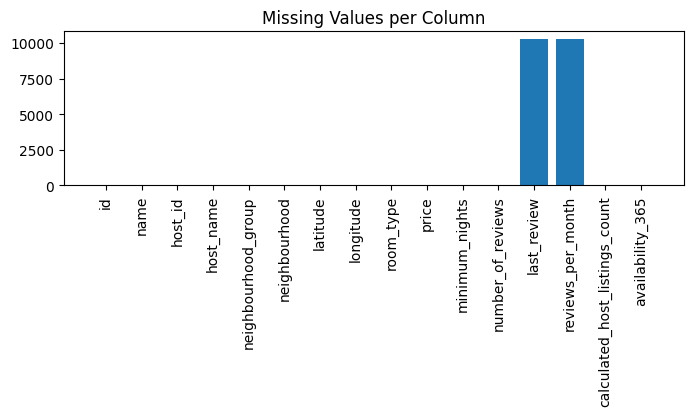

In [9]:
# Visualizing the missing values
plt.figure(figsize=(8,2))
plt.bar(airbnb_df.columns, airbnb_df.isna().sum(),)
#plt.ylim(0,10000)
plt.xticks(rotation=90)
plt.title('Missing Values per Column')
plt.show()

## So far knowledge about dataset

1.  Interestingly, we can observe that we have a good number of different data
types with a mix of categorical and numerical data.
2.  In total, there are 16 columns and 42930 rows which comprises ample information on which we can perform our in-depth analysis.
3.   We can also see from the above, there are some missing NaN values that will require cleaning and handling.
4.  We have a list of 5 categorical unique 'Neighbourhood_group' which are 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island', and 'Bronx'.
5.  There are 221 categorical unique 'Neighbourhood' data.
6.  We have prominently 3 different room types i.e 'Private room', 'Shared room' and Entire home/apt

In [10]:
# Dataset Columns
airbnb_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [11]:
# Dataset Describe
airbnb_df.describe()

id       host_id      latitude     longitude         price  \
count  4.293100e+04  4.293100e+04  42931.000000  42931.000000  42931.000000   
mean   2.222772e+17  1.516012e+08     40.728273    -73.943665    200.307167   
std    3.344213e+17  1.621301e+08      0.057640      0.056627    895.082911   
min    2.595000e+03  1.678000e+03     40.500314    -74.251907      0.000000   
25%    1.940474e+07  1.608533e+07     40.687485    -73.981750     75.000000   
50%    4.337482e+07  7.433812e+07     40.724040    -73.952620    125.000000   
75%    6.305015e+17  2.680692e+08     40.762293    -73.924035    200.000000   
max    8.404660e+17  5.038729e+08     40.911380    -73.710870  99000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    42931.000000       42931.000000       32627.000000   
mean        18.111178          25.856001           1.168988   
std         27.462513          56.616344           1.789675   
min          1.000000           0.000000           0.010000   
25%          2.000000           1.000000           0.140000   
50%          7.000000           5.000000           0.520000   
75%         30.000000          24.000000           1.670000   
max       1250.000000        1842.000000          86.610000   

       calculated_host_listings_count  availability_365  
count                    42931.000000      42931.000000  
mean                        24.054809        140.262211  
std                         80.867958        142.001486  
min                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          1.000000         89.000000  
75%                          4.000000        289.000000  
max                        526.000000        365.000000

In price column we can see that their is some error as the minimum price is zero which does't make sense. so we will check and try to remove this when we will perform some actions with respect to price column

Variables description

1.  id: listing ID
2.  name: name of the listing
3.  host_id: host ID
4.  host_name: name of the host
5.  neighbourhood_group: location
6.  neighbourhood: area
7.  latitude: latitude coordinates
8.  longitude: longitude coordinates
9.  room_type: listing space type
10. price: price in dollars
11. minimum_nights: minimum nights spend
12. number_of_reviews: number of reviews
13. last_review: latest review
14. reviews_per_month: number of reviews per month
15. calculated_host_listings_count: amount of listing per host
16. availability_365: number of days when listing is available for booking

In [12]:
# Check Unique Values for each variable.
print(f"The number of unique values in our Dataset is")
print("-"*35)
for i in airbnb_df.columns:
  print(f"'{i}' : {airbnb_df[i].nunique()}")

The number of unique values in our Dataset is
-----------------------------------
'id' : 41924
'name' : 41406
'host_id' : 27455
'host_name' : 9831
'neighbourhood_group' : 5
'neighbourhood' : 223
'latitude' : 22667
'longitude' : 20124
'room_type' : 4
'price' : 1089
'minimum_nights' : 128
'number_of_reviews' : 476
'last_review' : 2795
'reviews_per_month' : 881
'calculated_host_listings_count' : 65
'availability_365' : 366


## **Data Wrangling**

As we have seen above that we have some null and missing values in our data set, So we have to Clean our data set for predictive analysis

1.  Remove NaN values from the data
2.  Replace all the missing values with 0
3.  Dropping columns that are not required and are insignificant for our analysis

In [13]:
# Write your code to make your dataset analysis ready.
#we are creating a copy of our data file on which we will perform analysis, so the changes we are making will not affact the orignal DataFrame
df=airbnb_df
df.isnull().sum()

id                                    0
name                                 12
host_id                               0
host_name                             5
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10304
reviews_per_month                 10304
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [14]:
# Filling missing values in 'name' and 'host_name' column
df['name'].fillna('Absent', inplace = True)
df['host_name'].fillna('Absent', inplace =  True)

In [15]:
df.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10304
reviews_per_month                 10304
calculated_host_listings_count        0
availability_365                      0
dtype: int64

we have sucessfully filled our missing values in column 'name' and 'host_name' which was 12 and 5 earlier.

------------------------------------------------------------------------------------------

Now we will drop the unncessary columns

In [16]:
# Dropping the unncessary columns.
df=df.drop(['last_review','reviews_per_month'], axis=1)

In [17]:
df.head()

id                                         name  host_id  host_name  \
0  2595.0                        Skylit Midtown Castle     2845   Jennifer   
1  5121.0                              BlissArtsSpace!     7356      Garon   
2  5203.0           Cozy Clean Guest Room - Family Apt     7490  MaryEllen   
3  5178.0             Large Furnished Room Near B'way　     8967   Shunichi   
4  5136.0  Large Sunny Brooklyn Duplex, Patio + Garden     7378    Rebecca   

  neighbourhood_group       neighbourhood  latitude  longitude  \
0           Manhattan             Midtown  40.75356  -73.98559   
1            Brooklyn  Bedford-Stuyvesant  40.68535  -73.95512   
2           Manhattan     Upper West Side  40.80380  -73.96751   
3           Manhattan             Midtown  40.76457  -73.98317   
4            Brooklyn         Sunset Park  40.66265  -73.99454   

         room_type  price  minimum_nights  number_of_reviews  \
0  Entire home/apt    150              30                 49   
1     Private room     60              30                 50   
2     Private room     75               2                118   
3     Private room     68               2                575   
4  Entire home/apt    275              60                  3   

   calculated_host_listings_count  availability_365  
0                               3               314  
1                               2               365  
2                               1                 0  
3                               1               106  
4                               1               181

In [18]:
# Again checking for null values in the dataset
print(f'The number of missing values after cleaning the data are:')
df.isnull().sum()

The number of missing values after cleaning the data are:


id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

Zero missing values in our Data Set which means our data set is ready for analysis

## What all manipulations have you done and insights you found?

We Found that there are some null values present in our data set which may effect our output so we replace some missing values and droped the unnecessery column from the data set.

* 'name' and 'host_name' are sting datatype so we can't fill those values by median or mean value, so we have entered 'absent' in all the missing values in 'name' and 'host_name'columns
* Two columns are not of our use so have simply droped them

## **Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

Univariate Analysis

## **Chart - 1 (What is the overall distribution of room in our dataset)**

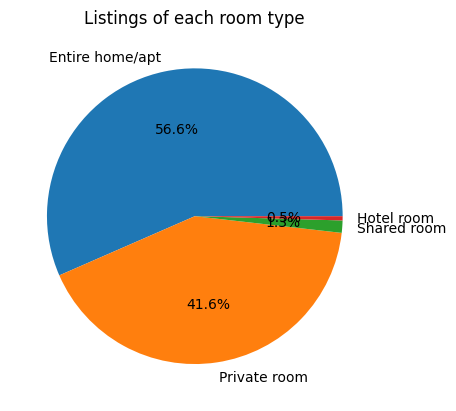

In [19]:
# Chart - 1 visualization code
p = plt.pie(df.room_type.value_counts(), labels= df.room_type.value_counts().index, autopct='%1.1f%%')
plt.title("Listings of each room type")
plt.show()

1. Why did you pick the specific chart?

  Pie chart is showing the total/overall distribution of types of room listed in our Airbnb data set

2. What is/are the insight(s) found from the chart?

  There is a very clear percentage division of the three different room types across the region, with 'Entire home/apt' accounting for 56.6% of listings, private room accounting for 41.6% and shared rooms representing just 1.3%.

3. Will the gained insights help creating a positive business impact?Are there any insights that lead to negative growth? Justify with specific reason.

  Yes, We can clearly see that there are entire and private room listed by users which means that customers are preferring private and entire rooms insted of shared room

## **Chart - 2 (what are the Diffrent type of room distributed in neighbourhood group)**

In [23]:
room_type_var = df.groupby(['neighbourhood_group','room_type'])['room_type'].count().unstack()
room_type_var


room_type            Entire home/apt  Hotel room  Private room  Shared room
neighbourhood_group                                                        
Bronx                          772.0         1.0         876.0         42.0
Brooklyn                      8913.0         8.0        7132.0        184.0
Manhattan                    11252.0       180.0        6013.0        213.0
Queens                        3093.0         8.0        3681.0        134.0
Staten Island                  249.0         NaN         177.0          3.0

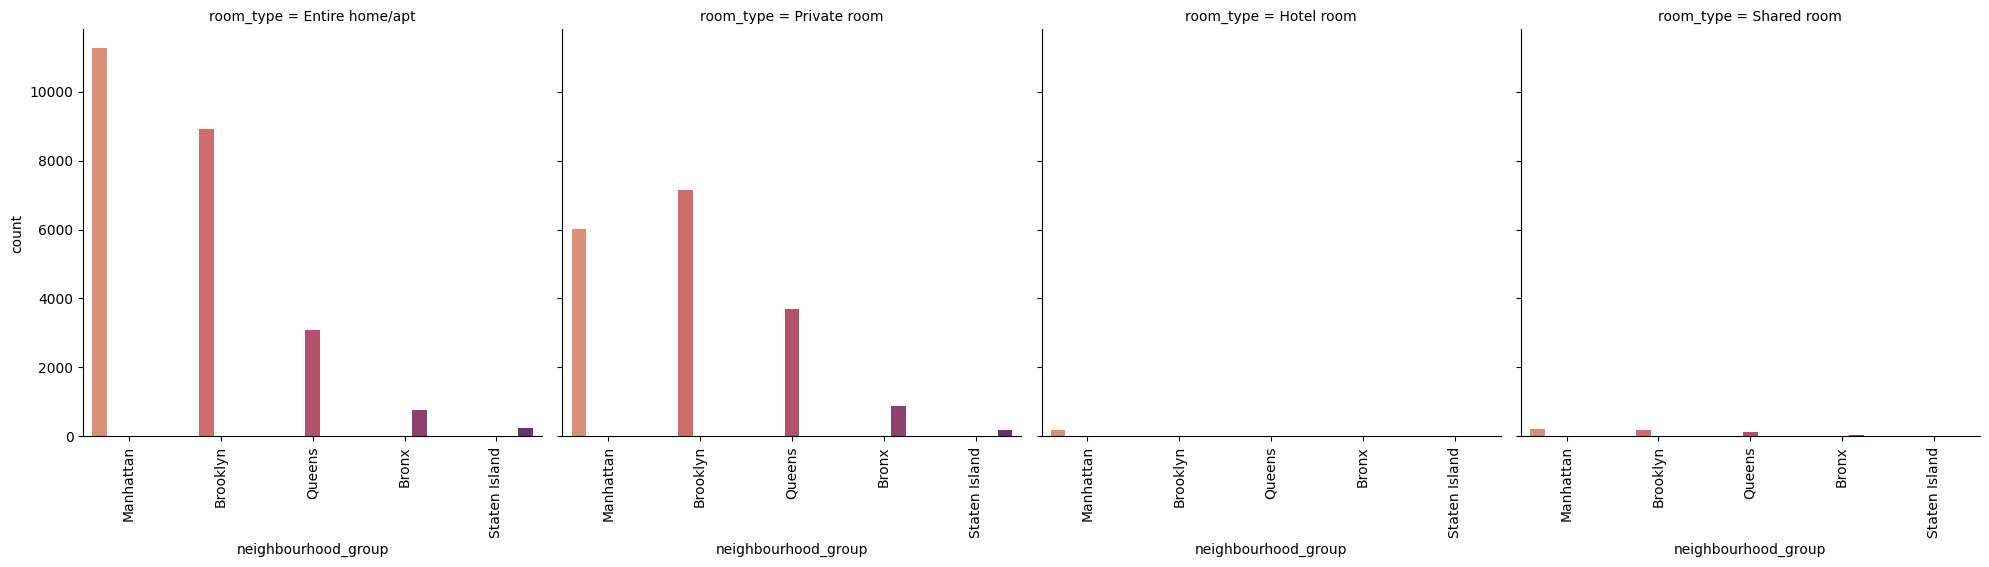

In [24]:
# Chart -2 visualization code
r = sns.catplot(data = df, x='neighbourhood_group', hue='neighbourhood_group', col='room_type', palette='flare',kind="count")
r.set_xticklabels(rotation=90)
sns.set(rc={'figure.figsize':(10,6)})
sns.set(style="white")

1. Why did you pick the specific chart?

  It shows the relationship between a numerical count of number of rooms listed in diffrent neighbourhood_group using one of several visual representations

2. What is/are the insight(s) found from the chart?
    
    It shows how rooms are distributed in to three type where

*  Manhattan has more then 10,000 rooms which are of Entire home type
*  Brooklyn has highest number of rooms which are Private rooms

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

  * Users who lives in Manhattan are hosting there property should rent "entire rooms" in order to earn more profit
  * for the customer who are looking for private rooms they can analyse that brooklyn has maximum private rooms so in order to get rooms accordingly one can get idea of how rooms are distributed1

## **Chart - 3 distribution across latitude and longitude with different room types**

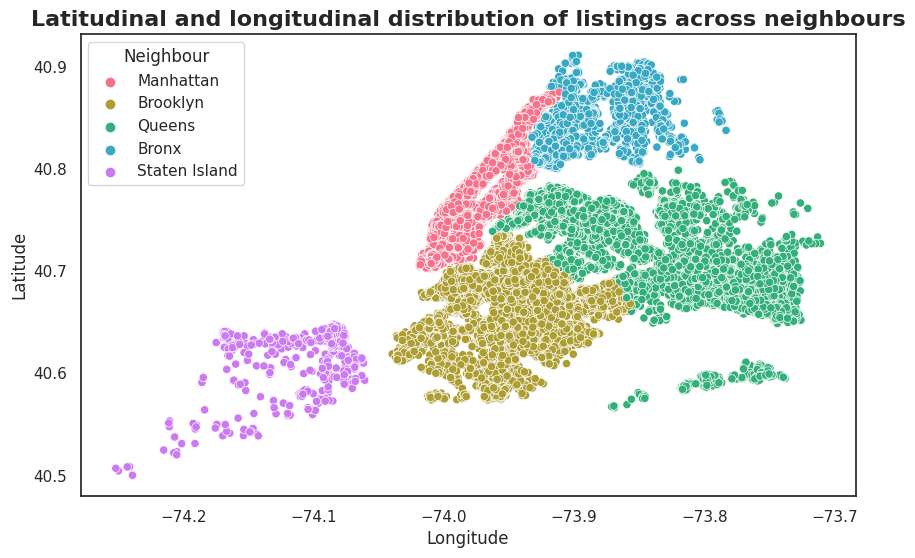

In [25]:
# Chart - 3 visualization code
lat = sns.scatterplot(x=df.longitude, y=df.latitude, hue=df.neighbourhood_group, palette="husl")

lat.set_title('Latitudinal and longitudinal distribution of listings across neighbours', weight='bold', fontsize = 16)
lat.set_xlabel('Longitude')
lat.set_ylabel('Latitude')
lat.legend(loc='upper left', title='Neighbour')

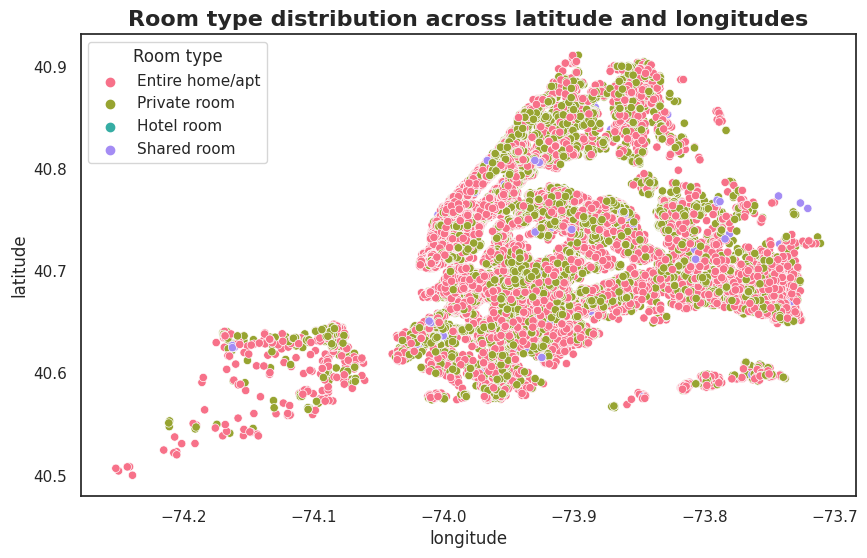

In [26]:
rm = sns.scatterplot(x=df.longitude, y=df.latitude, hue=df.room_type, palette="husl")
rm.set_title('Room type distribution across latitude and longitudes', weight='bold', fontsize = 16)
rm.legend(loc='upper left', title='Room type')


**1. Why did you pick the specific chart?**

  We are plotting scatter plot to have the cluster of the location

2.What is/are the insight(s) found from the chart?

 * It appears there are a few scattered listings across Queens and Staten Island. In contrast, Brooklyn and Manhattan have a crowded listing situation in their respective regions.
  * In terms of distribution of room types, we can see there is a good mix of different types available across the region. When compared with shared rooms, there is dominancy in private rooms and entire homes categories.

## **Chart - 4 ( who has the most listings and in which neighbourhood)**

In [27]:
host_areas = df.groupby(['host_name','neighbourhood_group'])['calculated_host_listings_count'].max().reset_index()
top_hosts = host_areas.sort_values(by = ['calculated_host_listings_count'], ascending = False).head(9).rename(columns = {'calculated_host_listings_count':'Numner Of property listed'})
top_hosts

host_name neighbourhood_group  Numner Of property listed
1607   Blueground              Queens                        526
1606   Blueground           Manhattan                        526
1605   Blueground            Brooklyn                        526
3806       Eugene              Queens                        394
3804       Eugene            Brooklyn                        394
3805       Eugene           Manhattan                        394
10457   RoomPicks            Brooklyn                        356
10458   RoomPicks           Manhattan                        356
6183         June            Brooklyn                        222

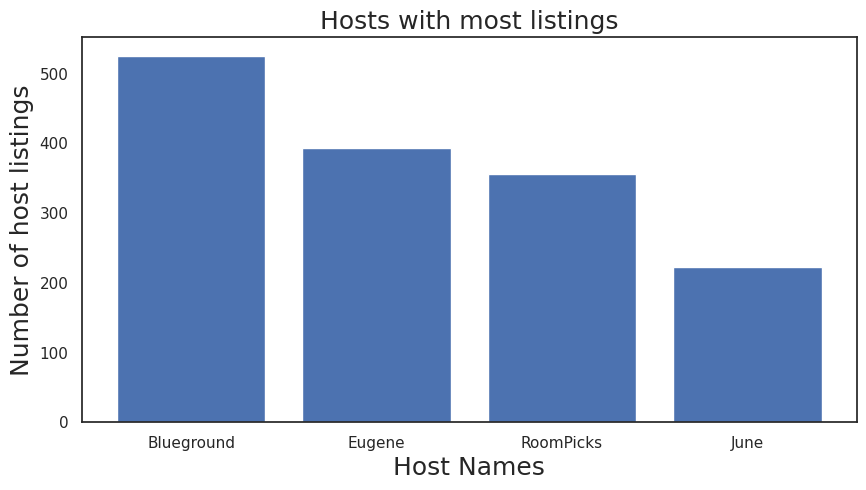

In [28]:
# Chart - 4 visualization code
plt.rcParams['figure.figsize'] = (10,5)
host_name = top_hosts['host_name']
host_lisitng = top_hosts['Numner Of property listed']
plt.bar(host_name,host_lisitng)
plt.title('Hosts with most listings',{'fontsize':18})
plt.xlabel('Host Names',{'fontsize':18})
plt.ylabel('Number of host listings',{'fontsize':18})
plt.show()

1.Why did you pick the specific chart?

  Bar chart is the simplest and easiest chart of all to portray how values are distributed, Here X-axis shows the name of host which has highest property listed, and Y-axis has the number of count a host holds

2.What is/are the insight(s) found from the chart?

From the above result, we can conclude that the name of the host with the most listings is Blueground(NYC) who has 500+ listings.

## **Chart - 5 (Top 10 neighbourhoods with maximum listings)**

In [29]:
# Chart - 5 visualization code
top_ten_neigh = df.groupby(['neighbourhood']).agg({'calculated_host_listings_count':['count']})
top_ten_neigh.columns = ['total_prop']
top_ten_neigh = top_ten_neigh.sort_values(by='total_prop', ascending=False).head(10)
top_ten_neigh.reset_index()


neighbourhood  total_prop
0  Bedford-Stuyvesant        3086
1        Williamsburg        2597
2             Midtown        2182
3              Harlem        2081
4            Bushwick        1810
5     Upper West Side        1541
6      Hell's Kitchen        1522
7     Upper East Side        1432
8       Crown Heights        1330
9        East Village        1155

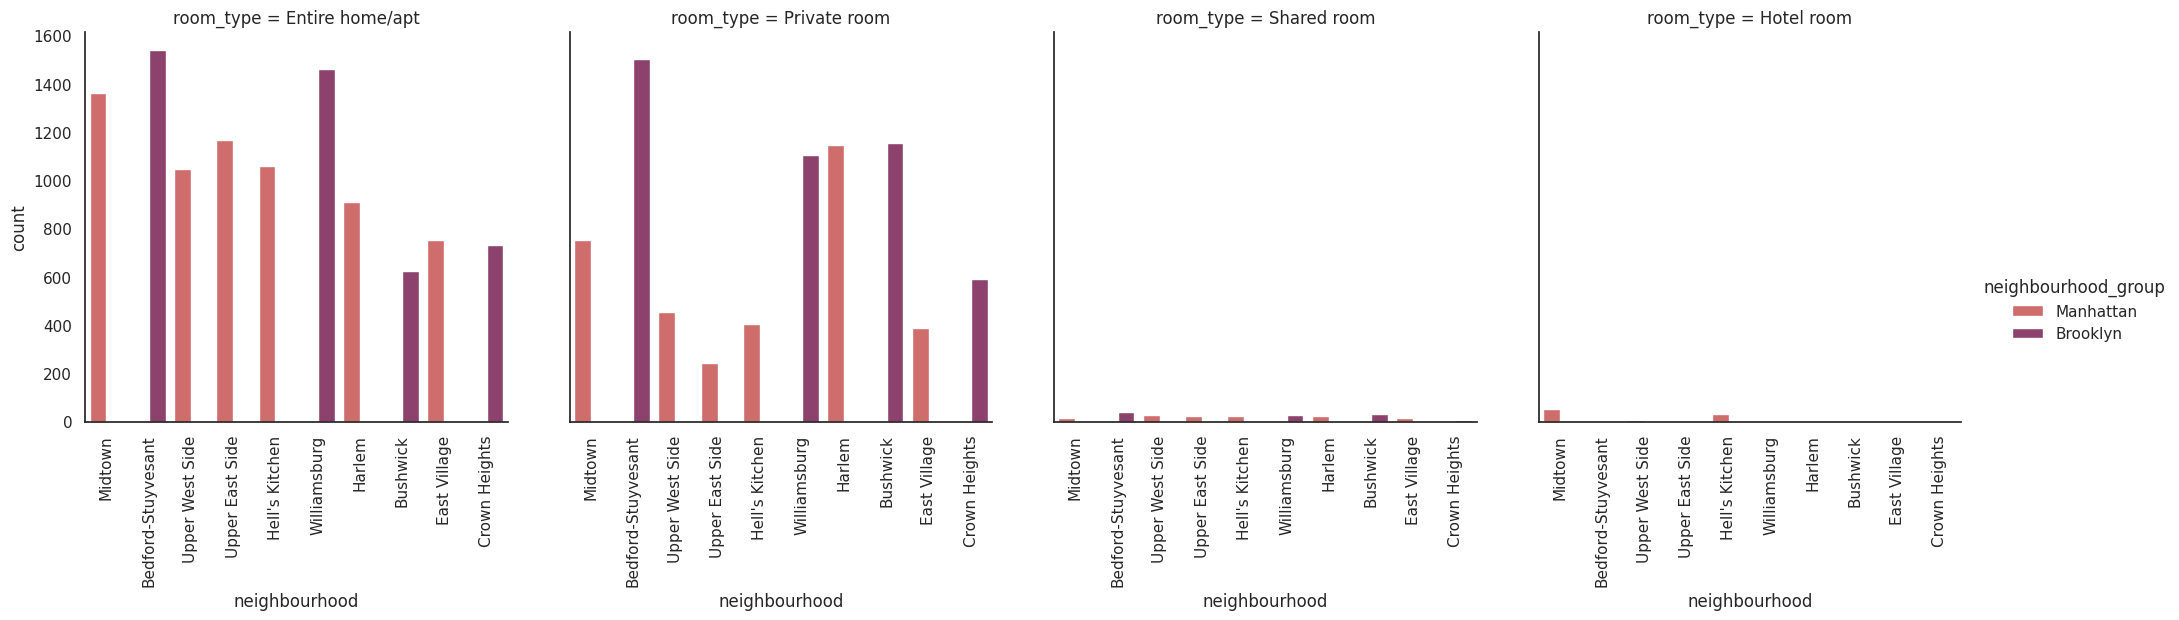

In [30]:
top_neighours = df.loc[df['neighbourhood'].isin(['Williamsburg','Bedford-Stuyvesant','Harlem','Bushwick','Upper West Side','Hell\'s Kitchen','East Village','Upper East Side','Crown Heights','Midtown'])]
s = sns.catplot(data = top_neighours, x='neighbourhood', hue='neighbourhood_group', col='room_type', palette='flare',  kind='count')
sns.set(rc={'figure.figsize':(12,7)})
sns.set(style="white")
s.set_xticklabels(rotation=90)


1.Why did you pick the specific chart?

Since we have more than two hundred neighbours listed out, so we will be taking a glimpse of only the top ten neighbours who has more number of listings.

2.What is/are the insight(s) found from the chart?

* One thing to note is that we only have two boroughs listed among the top ten: Manhattan and Brooklyn. For Brooklyn borough, Williamsburg and Bedford-Stuyvesant are more popular.
* It is surprising to see that 'Hotel rooms' barely make the top 10 neighbourhoods.

3.Will the gained insights help creating a positive business impact?

In Broooklyn,Entire home/apt are more listed as compred to any other category and  similary for Manhattan more people prefer entire home/appartment.

## **Chart - 6 Top Keywords used in the listing Property by users Host's**

We will be using the Wordcloud library for Extracting name from column. Word clouds use frequency counts of the words as input and return a graphic display of the most frequently occurring words with their size proportional to their relative frequency. We can see a large number of naming patterns used by our hosts for their listings. Using the word cloud as a tool for analysis, we can uncover some interesting trends that may help us understand our hosts' behavior and mindset.

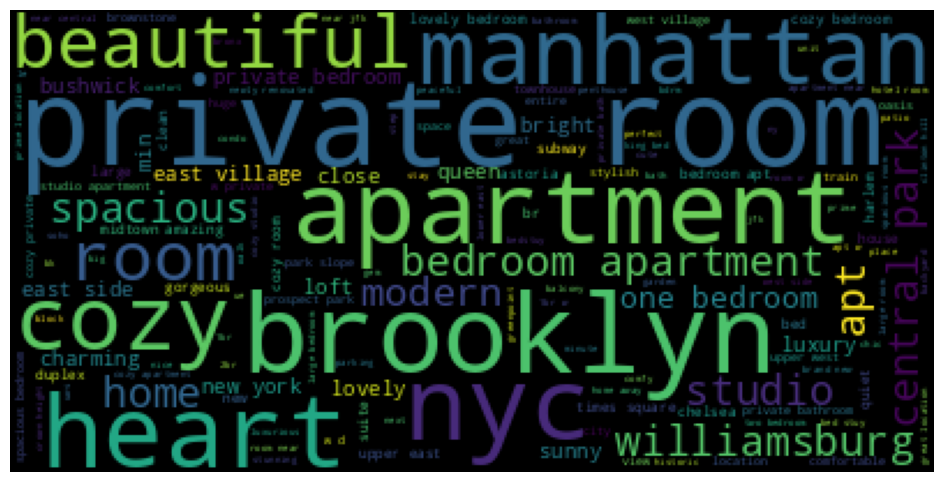

In [34]:
# Chart - 6
text = ' '.join(str(n).lower() for n in df.name)

wordcloud = WordCloud(max_words=200, background_color = 'black').generate(text)
#visualization code
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='antialiased')
plt.axis('off')
plt.show()

1.Why did you pick the specific chart?

  Word clouds use frequency counts of the words as input and return a graphic display of the most frequently occurring words with their size proportional to their relative frequency.

2.What is/are the insight(s) found from the chart?

* Based on the above resultant word cloud, it is evident that hosts are using simple and location-oriented keywords to differentiate their listings such location is the key indicator, since the words "Manhattan" , "Williamsburg" , "Brooklyn" are prominently displayed.
* Furthermore, we can see some adjectives such as "beautiful", "quiet", "cozy", "heart" and "gorgeous" bedrooms/apartments, which indicates that visitor comfort is a top priority.
* Several mentions of "private rooms" indicate the popularity of this room type in the city.

3.Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

  Yes,
  By this insight we can see that if the new host is plaining to list his property on rent so he can see what are the hot word's are most used word for searching property

## **Chart - 7 ( What is the average preferred price by customers according to the location and room type?)**

Since we will be using with the price column to perform calculations and we have seen above that their was something wrong into the data set so it is important to check it for outliers first.


In [35]:
df.agg({'price': ['mean', 'median', 'min', 'max', 'count']})

price
mean      200.307167
median    125.000000
min         0.000000
max     99000.000000
count   42931.000000

The minimum value is set as zero, which does not make any sense since there are no free rooms on Airbnb - and the maximum value is set 99,000 - which just seems too high. Notice how the mean is considerably higher than the median. This is an indication that the data is skewed.

Let's use a boxplot to get a better understanding of price distribution

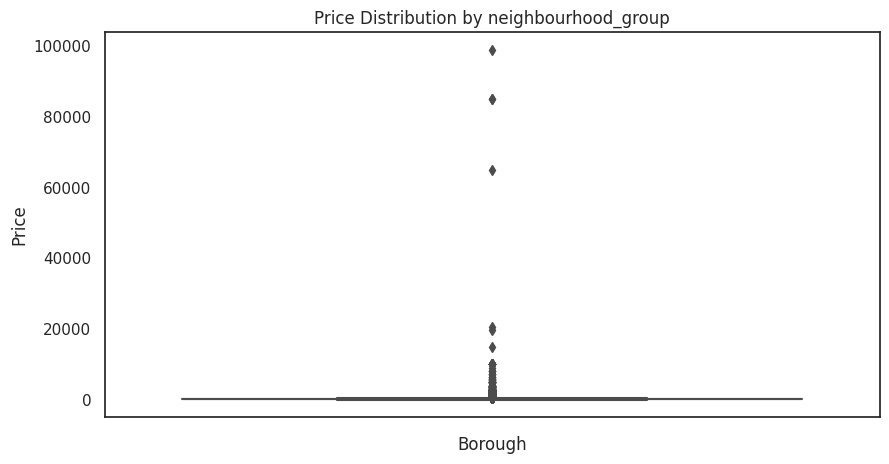

In [36]:
#visualization code for checking outliers
plt.figure(figsize=(10,5))
ax = sns.boxplot(y='price', data=df).set_title('Price Distribution by neighbourhood_group')
sns.set_theme(style='white')
plt.xlabel('Borough')
plt.ylabel('Price')
plt.show()

As expected there are outliers present in the data. In order to fix this, we will be using the quantile based flooring and capping. First, let's print the 10th and 90th percentile of the price column.

In [37]:
# low quantile
q_low = df['price'].quantile(0.10)
q_low

50.0

In [38]:
#high quantile
q_high = df['price'].quantile(0.9)
q_high

339.0

Looks like the 10th percentile is $50 and the 90th percentile is $339. Since we are dealing with Airbnb listings, it is not uncommon for a few places to be much more expensive than others, especially luxurious ones.

Given that we are going to perform calculations in our data and the mean can be skewed by outliers, let's go ahead and implement the above technique by removing the values that don't apply to the specified range – set between $50 and $339.

In [40]:
#removing the values below 10th percentile and above 90th percentile
df = df[(df['price'] >= q_low) & (df['price'] <= q_high)]

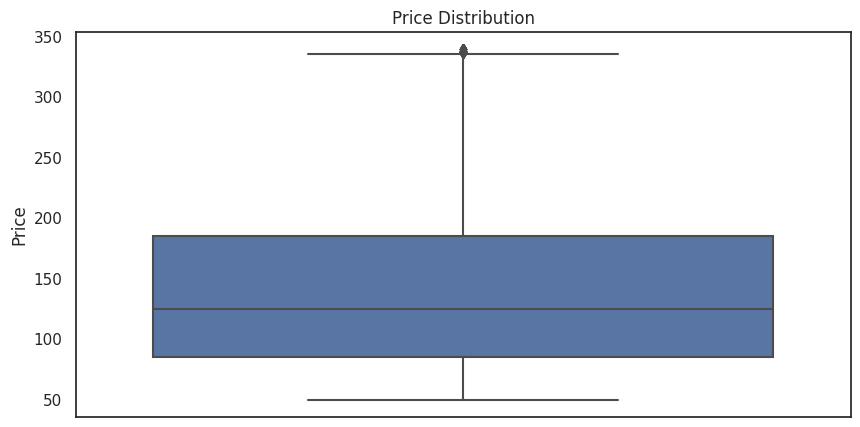

In [41]:
#Lets create a new boxplot and check the result.
plt.figure(figsize=(10,5))
ax = sns.boxplot(y='price', data=df).set_title('Price Distribution')
sns.set_theme(style='white')
plt.ylabel('Price')
plt.show()

We have sucessfully removed the outliers from our data set and we are now ready analyse data with respect to 'Price'

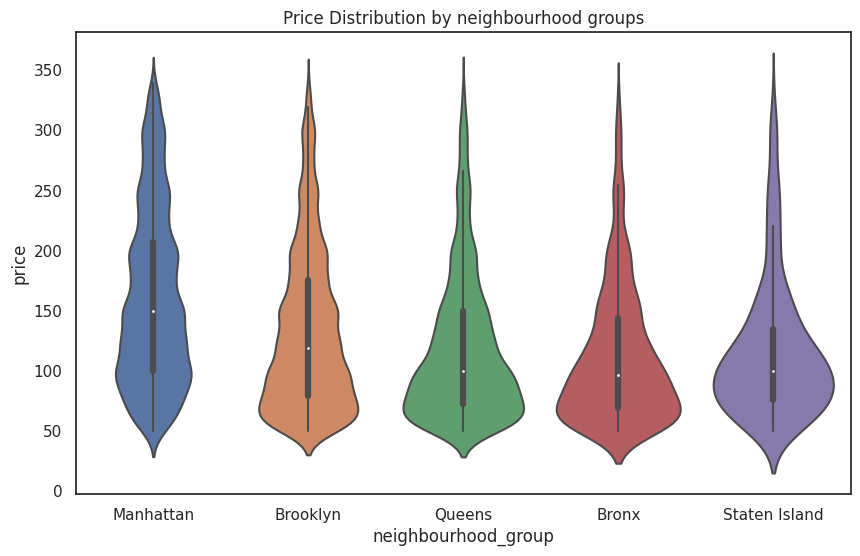

In [42]:
# Chart - 7
#Now lets see the price distribution by neighbourhood gropus
plt.figure(figsize=(10,6))
ax = sns.violinplot(x="neighbourhood_group", y="price", data=df).set_title('Price Distribution by neighbourhood groups')
plt.show()

By looking at the violin plot, we can see that Manhattan has a higher price range and is the most expensive one. Brooklyn has the second-highest rental prices, while the Bronx appears as the most affordable one.

As we can Know that We have prominently 3 different room types i.e 'Private room', 'Shared room' and Entire home/apt. so we will calculate the avg price for each room type

1.Why did you chose this chart?

   It allows us to compare the shapes of these distributions, detect outliers, and understand the central tendency and spread of prices within each group effectively.

2.What is/are the insight(s) found from the chart?

By looking at the violin plot, we can see that Manhattan has a higher price range and is the most expensive one. Brooklyn has the second-highest rental prices, while the Bronx appears as the most affordable one

3.Will the gained insights help creating a positive business impact?

  The insights from the violin plot can have a positive business impact by guiding pricing and marketing strategies. However, overpricing and neglecting local factors may lead to negative growth.


## **Bivariate Analysis**
Bivariate analysis is one of the simplest forms of quantitative analysis. It involves the analysis of two variables, for the purpose of determining the empirical relationship between them.

## **Chart - 8 Analyzing the number of reviews and room availability with respect to price**

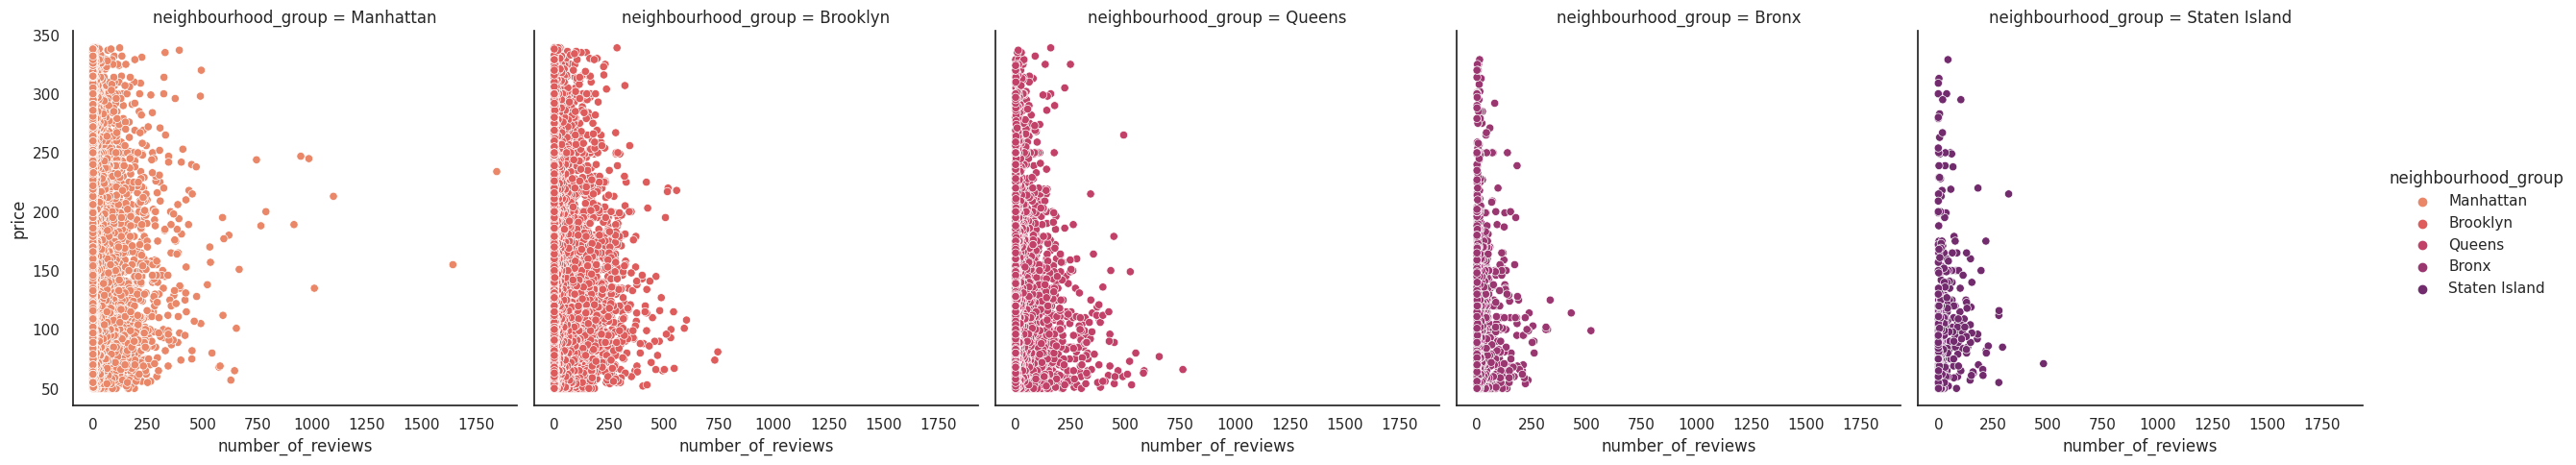

In [43]:
sns.relplot(x=df.number_of_reviews, y=df.price, hue=df.neighbourhood_group, col=df.neighbourhood_group, palette="flare")
sns.set(rc={'figure.figsize':(10,6)})
sns.set(style="white")

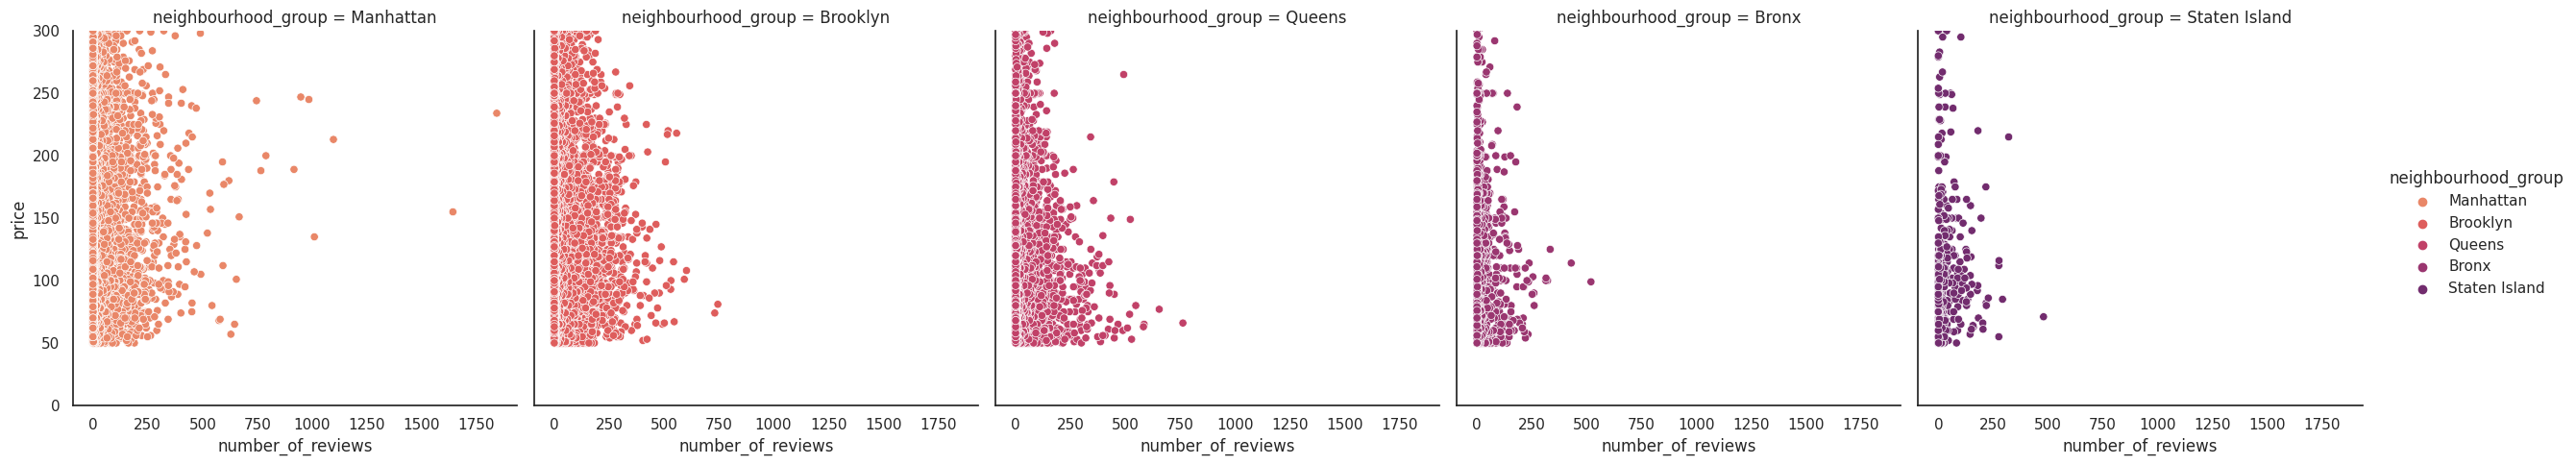

In [44]:
sns.relplot(x=df.number_of_reviews, y=df.price, hue=df.neighbourhood_group, col=df.neighbourhood_group, palette="flare")
sns.set(rc={'figure.figsize':(10,6)})
plt.ylim(0,300)
sns.set(style="white")

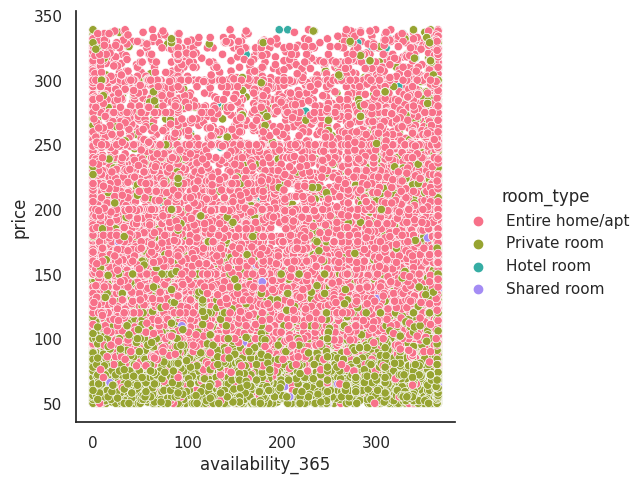

In [45]:
sns.relplot(x=df.availability_365, y=df.price, hue=df.room_type, palette="husl")
sns.set(rc={'figure.figsize':(10,6)})
sns.set(style="white")

1.Why did you pick the specific chart?


A stacked bar graph is one particular type of bar graph that can give us a great deal of information. In this graph, for instance, the share of each form of lodging is displayed along with the type of accommodations offered by Airbnb in various areas of New York City. For instance, room rentals are more common in the Bronx than complete houses or flats in Manhattan. Manhattan has the most shared rooms, however compared to other types of lodging, this type is the least prevalent there. Renting entire apartments or rooms, which is not the case in other sections of New York, is much less popular than renting private rooms in the Bronx.



2.What is/are the insight(s) found from the chart?


From the first graph, we can see a negative relationship between price and the number of reviews. There are more reviews for properties with lower prices since they are booked more frequently.
According to the second graph, the price of properties does not vary much in relation to their availability.



3.Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We can see a negative relationship between price and the number of reviews. There are more reviews for properties with lower price since they are booked frequently

## **Chart - 9 which neighbourhood has got maximum number of reviews.**

In [46]:
# Finding which neighbourhood has got maximum number of reviews.
areas_reviews = df.groupby(['neighbourhood_group'])['number_of_reviews'].max().reset_index().sort_values(by = 'number_of_reviews', ascending = False)
areas_reviews

neighbourhood_group  number_of_reviews
2           Manhattan               1842
3              Queens                763
1            Brooklyn                746
0               Bronx                520
4       Staten Island                480

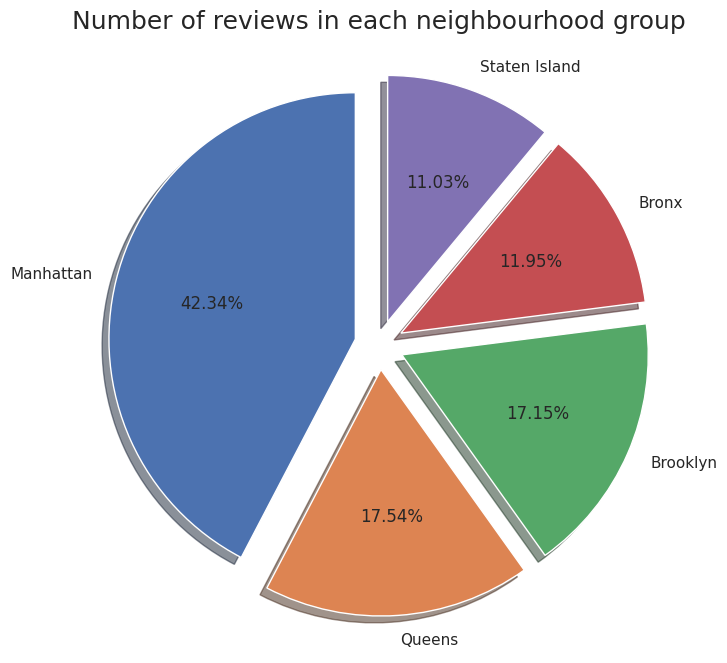

In [47]:
#Visualising the number of reviews in each neighbourhood group through pie chart
plt.rcParams['figure.figsize'] = (13,8)
reviews = areas_reviews['number_of_reviews']
plt.pie(reviews, labels = areas_reviews['neighbourhood_group'], autopct ='%0.2f%%', startangle =90, explode = [0.1,0.1,0.1,0.1,0.1], shadow = True )
plt.title('Number of reviews in each neighbourhood group', {'fontsize': 18})
plt.show()

1.Why did you pick the specific chart?

  pie chat shows the percentage of review each neighbourhood has.

2.What is/are the insight(s) found from the chart?

  Considering the reviews we can understand that manhattan is the place which is mostly liked by users.

## **Chart -10 Room Availability by neighbourhood_group**

In [48]:
df.groupby(['neighbourhood_group'])['availability_365'].mean()

neighbourhood_group
Bronx            214.958303
Brooklyn         125.365038
Manhattan        125.606986
Queens           182.426401
Staten Island    216.068306
Name: availability_365, dtype: float64

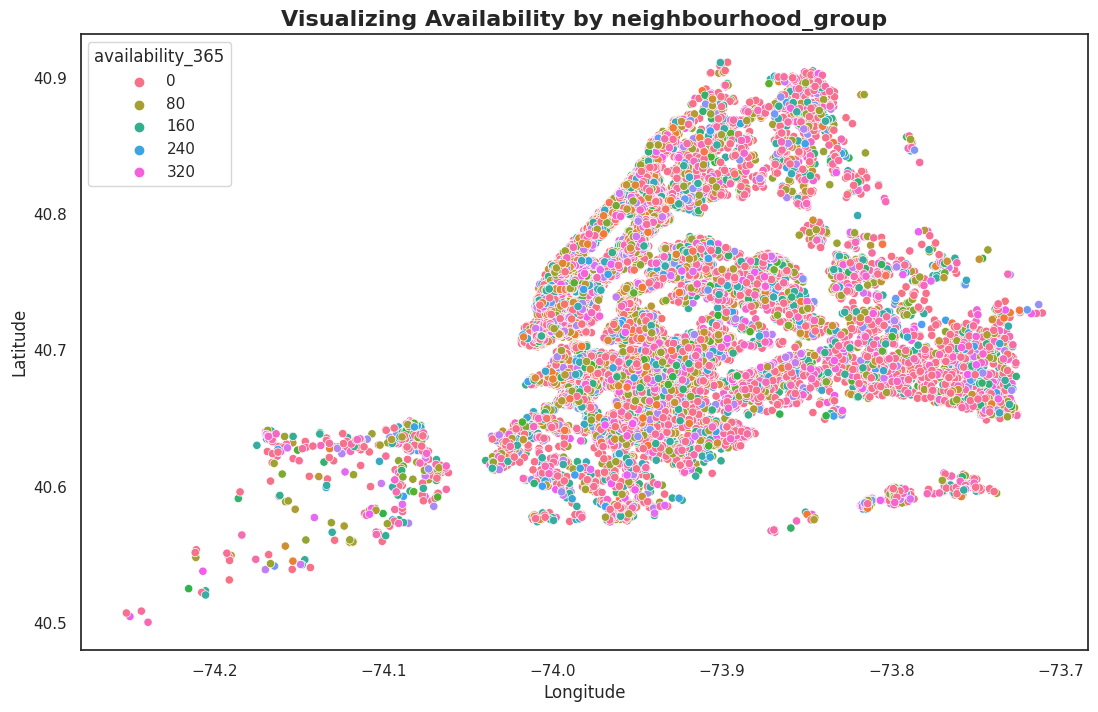

In [49]:
# Chart - 10 visualization code
lat = sns.scatterplot(x=df.longitude, y=df.latitude, hue=df.availability_365, palette="husl")
lat.set_title('Visualizing Availability by neighbourhood_group', weight='bold', fontsize = 16)
lat.set_xlabel('Longitude')
lat.set_ylabel('Latitude')
lat.legend(loc='upper left', title='availability_365')


1.Why did you pick the specific chart?

  This charts shows us the distribution of properties with count in each neighbourhood

2.What is/are the insight(s) found from the chart?

  We can see here, that most of the properties fall in the Brooklyn or Manhattan neighbourhood group, while there very few properties in Bronx and Staten Island.

## **Chart - 11 What is the average preferred price by customers according to the location?**

In [58]:

avg_preffered_price_df = df.groupby(['neighbourhood_group','room_type'])['price'].mean().reset_index()
avg_preffered_price_df.rename(columns={'neighbourhood_group':'Location','price':'Average_Price_Paid'})

Location        room_type  Average_Price_Paid
0           Bronx  Entire home/apt          137.892077
1           Bronx     Private room           82.833076
2           Bronx      Shared room          128.000000
3        Brooklyn  Entire home/apt          163.349800
4        Brooklyn       Hotel room          166.500000
5        Brooklyn     Private room           86.756803
6        Brooklyn      Shared room          100.695122
7       Manhattan  Entire home/apt          182.490704
8       Manhattan       Hotel room          235.398148
9       Manhattan     Private room          119.920930
10      Manhattan      Shared room           98.113924
11         Queens  Entire home/apt          148.476025
12         Queens       Hotel room          160.625000
13         Queens     Private room           84.777381
14         Queens      Shared room           94.017857
15  Staten Island  Entire home/apt          134.471861
16  Staten Island     Private room           86.128788
17  Staten Island      Shared room           99.000000

In [59]:
#Unstack the group by information for plot the graph
avg_preffered_price_df = df.groupby(['neighbourhood_group','room_type'])['price'].mean().unstack()
avg_preffered_price_df

room_type            Entire home/apt  Hotel room  Private room  Shared room
neighbourhood_group                                                        
Bronx                     137.892077         NaN     82.833076   128.000000
Brooklyn                  163.349800  166.500000     86.756803   100.695122
Manhattan                 182.490704  235.398148    119.920930    98.113924
Queens                    148.476025  160.625000     84.777381    94.017857
Staten Island             134.471861         NaN     86.128788    99.000000

<Axes: xlabel='neighbourhood_group'>

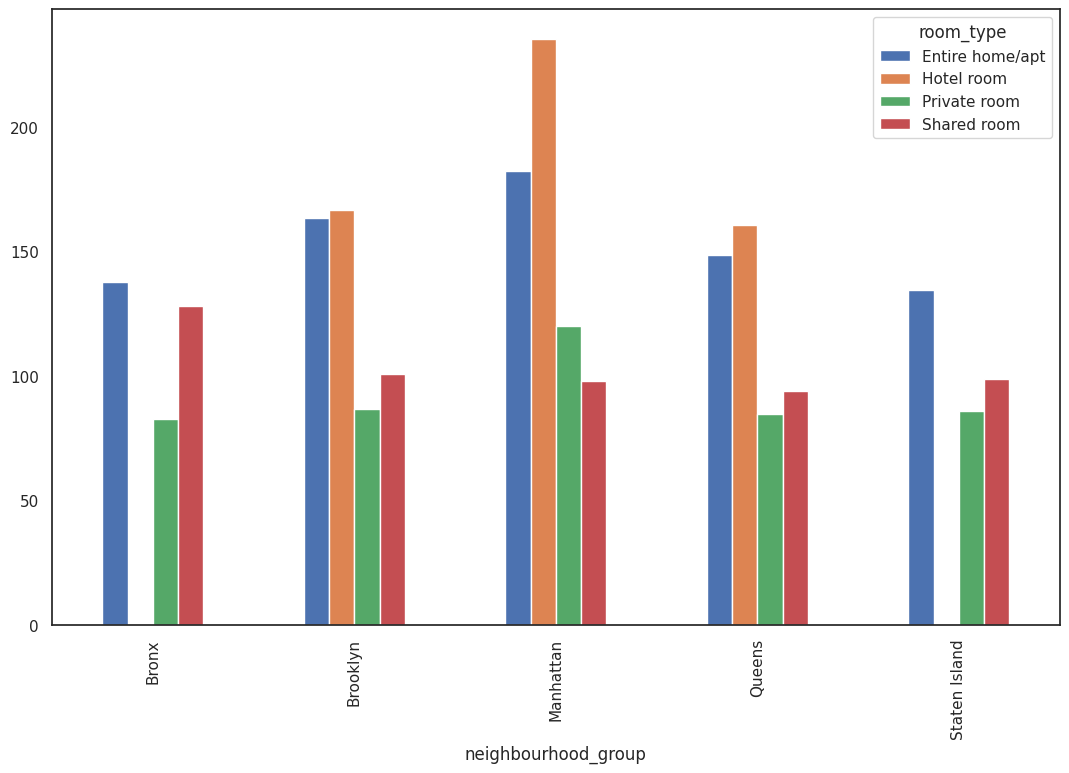

In [60]:
#Graph of average price of property according to location
avg_preffered_price_df.plot.bar()

1.Why did you pick the specific chart?

  Bar chart is clearly showing the distribution of price acoording to room type in diffrent locations

2.What is/are the insight(s) found from the chart?

 For hotel room the price is high everywhere,hotel room is high in Manhattan and low in other areas while the shared room case is opposite of  it.

## **Chart - 12 Find total no. nights spend per location**

In [61]:
#  find the maximum(minimum nights) spending by customer across different neighourhood group
total_nights=df.groupby('neighbourhood_group')['minimum_nights'].sum().reset_index()
final_nights=total_nights.sort_values('minimum_nights',ascending=False)
final_nights.head()

neighbourhood_group  minimum_nights
2           Manhattan          307625
1            Brooklyn          216339
3              Queens           64282
0               Bronx           12518
4       Staten Island            3157

[Text(0, 0, 'Manhattan'),
 Text(1, 0, 'Brooklyn'),
 Text(2, 0, 'Queens'),
 Text(3, 0, 'Bronx'),
 Text(4, 0, 'Staten Island')]

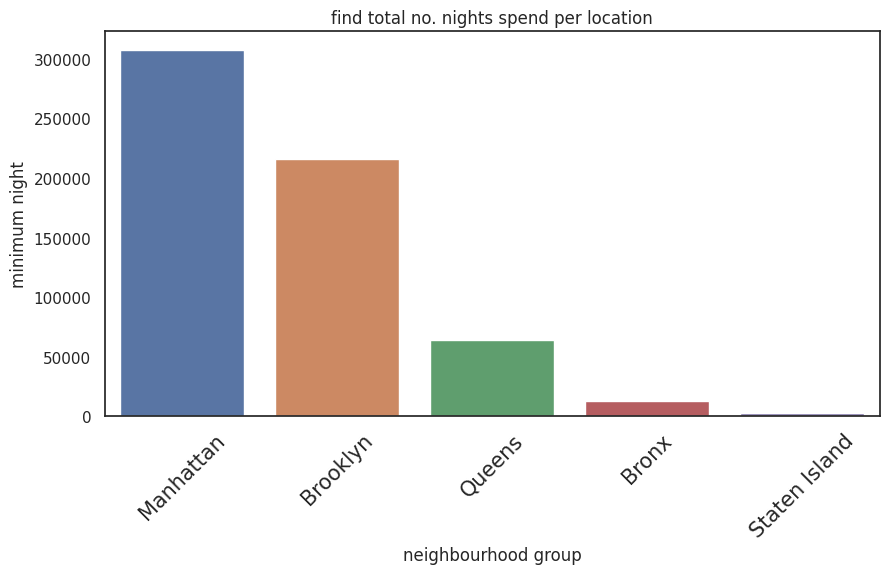

In [62]:
# visualization of total no. nights spend per location using seaborn
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style('white')
abc= sns.barplot(x='neighbourhood_group',y='minimum_nights',data = final_nights)
abc.set_title('find total no. nights spend per location')
abc.set_ylabel('minimum night')
abc.set_xlabel('neighbourhood group')
abc.set_xticklabels(abc.get_xticklabels(),rotation = 45,size='15')

1.Why did you pick the specific chart?

  Bar chart is the Simplest way to show the count of night spent at diffrent locations

2. What is/are the insight(s) found from the chart?

  rooms in manhattan are the busiest rooms as most of the night spend are in manhattan

3.Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

  The diffrence is huge, between Brooklyn and Manhattan, as Manhattan has been described as the cultural, financial, media, and entertainment capital of the world.

# **Multivariate Analysis**

<ipython-input-63-f34d33b9a6f1>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


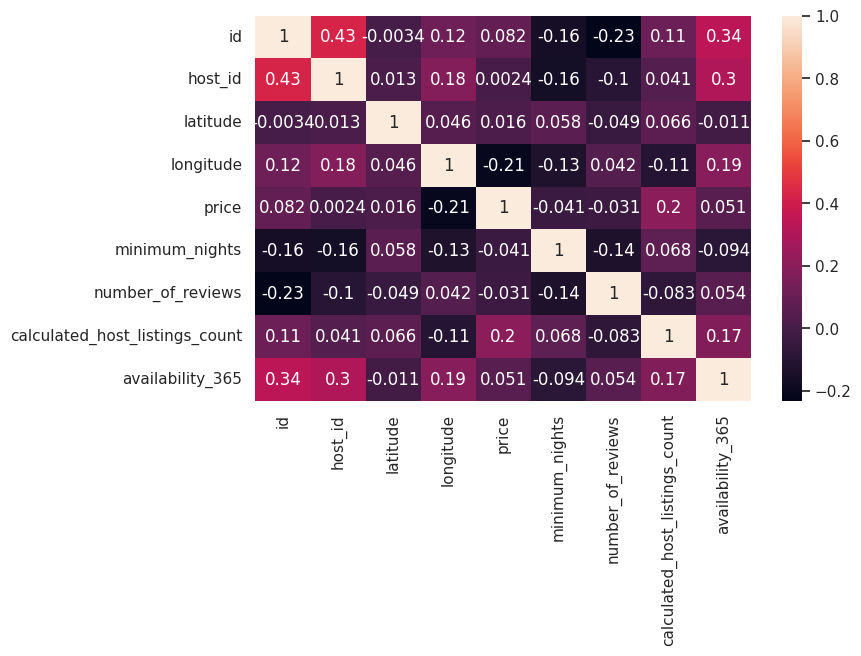

In [63]:
# Correlation Heatmap visualization code
# plotting the heatmap
plt.figure(figsize = (8,5))
sns.heatmap(df.corr(), annot=True)
# displaying the plotted heatmap
plt.show()

1. Why did you pick the specific chart?

  Using the color variation, we can depict the correlation between the variables on both axes. On either side of the axis, darker colors indicate a negative correlation between both variables.

2.What is/are the insight(s) found from the chart?

  1. Using the color variation, we can depict the correlation between the variables on both axes. On either side of the axis, darker colors indicate a negative correlation between both variables.
  2. There is a negative correlation between 'price' and 'longitude' since the higher prices are usually found in busier places.
  3. In addition, we can observe a negative correlation between 'price' and 'number_of_reviews', which leads to the conclusion that properties with lower prices are more likely to be booked and have more reviews.

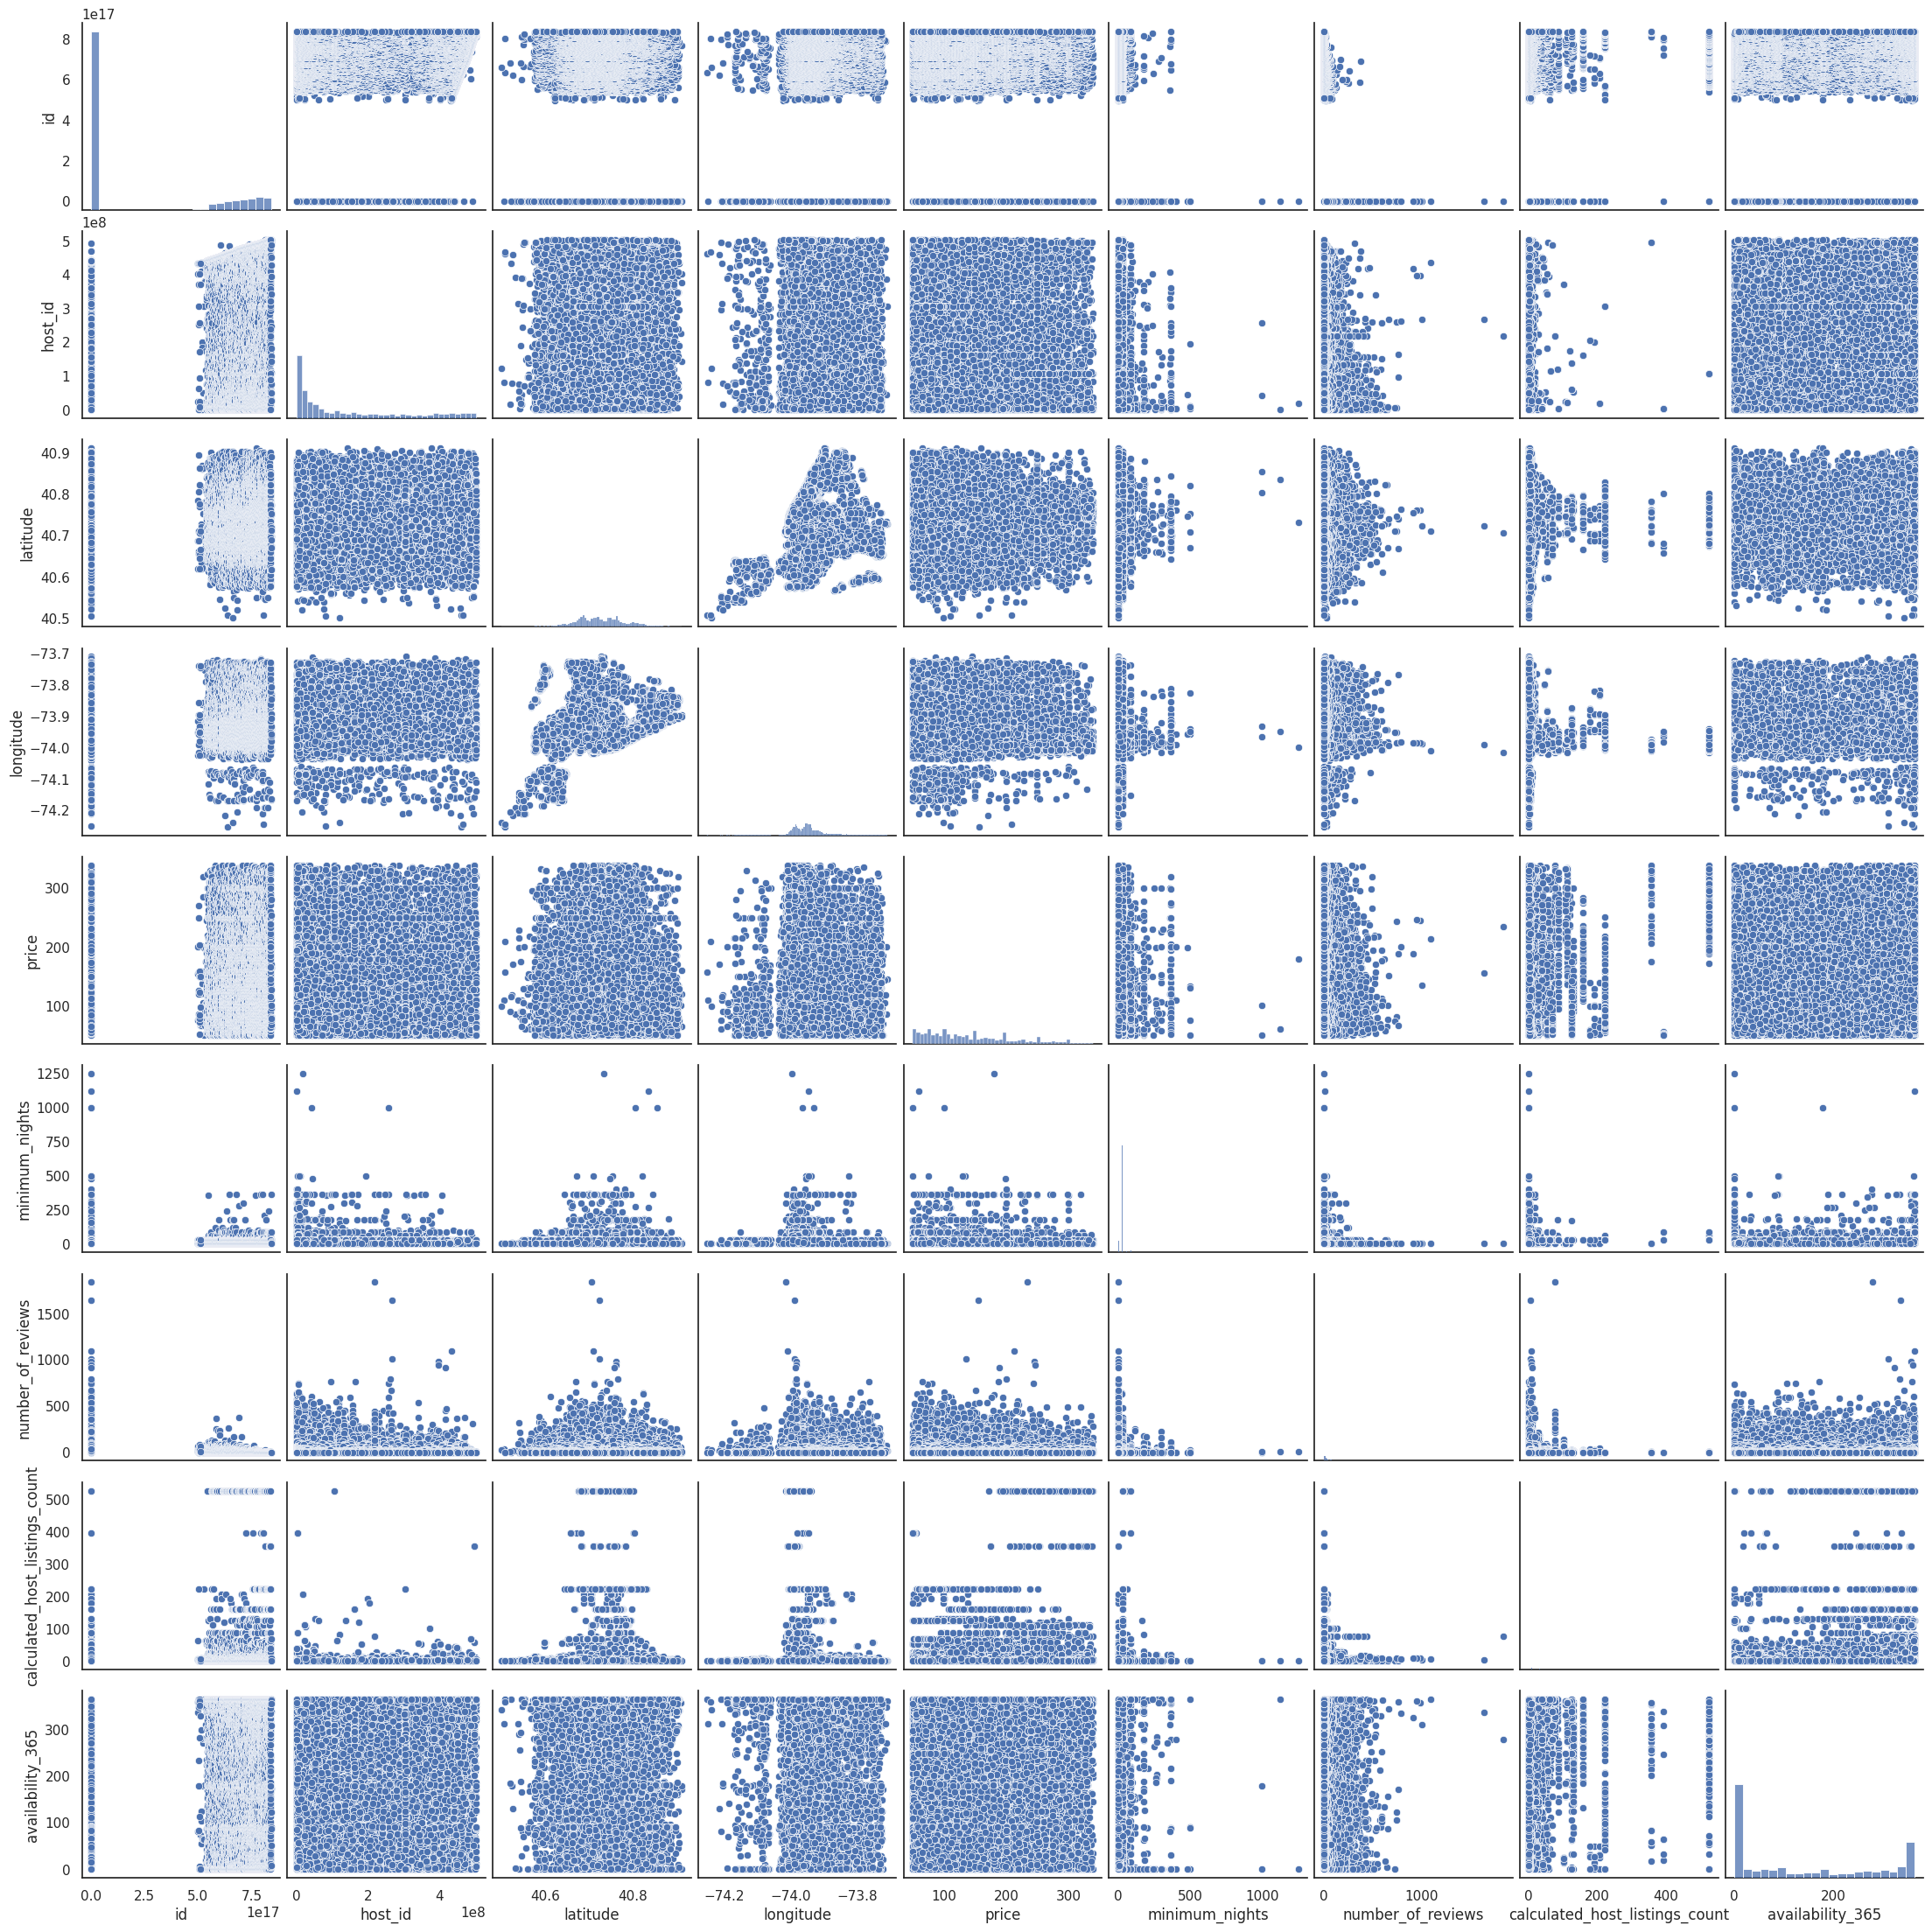

In [64]:
# Pair Plot visualization code
sns.pairplot(df)

1.Why did you pick the specific chart?

   To visualize relationships and correlations between multiple variables simultaneously, helping  identify patterns and gain insights into  dataset, which can be valuable for data exploration and decision-making.

## **Solution to Business Objective**

* Majority is focusing on Entire home which is 42%
* Manhattan is the most focused place in New York for hosts to do their business so this the targeted location among all
* 150$ is the average price for hot city
* Customers are prefering private rooms more then shared rooms so one can list private rooms more than shared room to achive more profit
* More customer preferred Manhattan location for night stay then Brooklyn
* In terms of reviews Manhattan has highest reviews

# **Conclusion**

1.The percentage distribution of three unique room types was as follows:
* Entire home/apt - 56.6%
* Private room - 41.6%
* Shared room - 1.4%
2.Detailed Distribution of rooms

* Majority of Entire homes are in Manhattan followed by Brooklyn
* Talking about private rooms , Brooklyn has Highest number of Private rooms followed by Manhattan and Queens
* We can hardly see shared rooms in airbnb dataset
3.We have one host named Sonder(NYC) who has more then 300 property listed in airbnb in Manhattan

4.Williamsburg and Bedford-Stuyvesant were found to be more popular neighbourhoods in Brooklyn borough

5.A statistical analysis shows that Manhattan has the most expensive price range with an average of 140 dollars followed by the Brooklyn with an average of 90 dollars.

6.Bronx provides the cheapest accommodation among all.

7.Brooklyn has more traffic than Manhattan which might be due to differences in the price distribution.

8.It is evident that hosts are using simple and location-oriented keywords to
differentiate their listings.

9.Several mentions of “private rooms” indicate the popularity of this room type in the city

## **Successfully Completed EDA Capstone Project!!!!**